<a href="https://colab.research.google.com/github/azimjaan21/MNIST-Handwritten-Digit-Recognition/blob/main/Handwritten_Digit_Recognition_Using_k_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📥 Dataset Acquisition (MNIST)

In [4]:
from sklearn.datasets import fetch_openml

#Load the Dataset
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

X, y = mnist['data'], mnist['target']

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


 There are **70,000 images**, and each image has **784 features**.

#🔍 Data Exploration


In [5]:
#Check the shape of the Data
print(X.shape)
print(y.shape)

#Check unique labels
print(set(y))

(70000, 784)
(70000,)
{'5', '4', '0', '9', '6', '7', '1', '2', '3', '8'}


#🖼 Visualize Some Digits


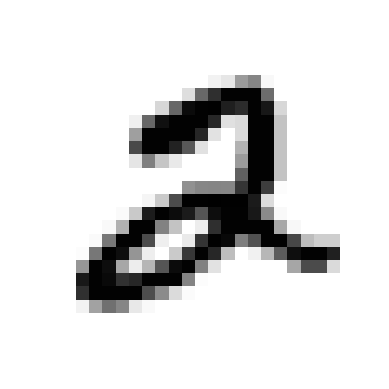

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import random

#Function to plot a digit

some_digit = X.iloc[random.randint(0,9)]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [7]:
print("Random Digit:\n", X.iloc[random.randint(0,9)].values)

Random Digit:
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 124. 253. 255.  63.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.  96. 244. 251. 253.  62.   0.   0.   0.   0.  

#🛠 Data Preprocessing


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#🤖 Implement k-NN Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Train the Model
knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X_train, y_train)

Accuracy: 0.9700714285714286


#📊 Model Evaluation

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Make Predictions
y_pred = knn_clf.predict(X_test)

#Evaluate the Model

#Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Confussion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

#Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.9700714285714286
Confusion Matrix:
 [[1336    0    3    0    0    0    2    1    1    0]
 [   0 1592    2    0    1    1    0    3    0    1]
 [   7   17 1323    1    4    1    5   17    3    2]
 [   0    2   12 1384    1    8    2    7    7   10]
 [   3    8    1    0 1251    0    2    3    1   26]
 [   2    5    0   16    2 1232   13    0    1    2]
 [   5    1    0    0    5    6 1379    0    0    0]
 [   1   21    4    0    4    0    0 1458    1   14]
 [   4   13    6   22    2   19    4   10 1267   10]
 [   6    5    2   11   19    0    0   17    1 1359]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.96      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6      

#⚙️ Hyperparameter Tuning


In [12]:
from sklearn.model_selection import cross_val_score

k_values = [1, 3, 5, 9]

for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_clf, X_train, y_train, cv=5)

    print(f"k={k}: Mean Accuracy={scores.mean():.2f}, Std={scores.std():.2f}")

k=1: Mean Accuracy=0.97, Std=0.00
k=3: Mean Accuracy=0.97, Std=0.00
k=5: Mean Accuracy=0.97, Std=0.00
k=9: Mean Accuracy=0.97, Std=0.00


#🏆 Results and Insights

The MNIST dataset was loaded, preprocessed, and used to train a k-NN classifier.

 The model achieved an accuracy of **approximately 97%**, indicating good performance in recognizing handwritten digits.
 Hyperparameter tuning was performed to find the optimal value of k for the k-NN classifier.
